In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('analysis_data.csv')
df

,Unnamed: 0,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved,Year_Bins,Age_Bins
0,0,male,armed,White,Aloha,OR,No,False,False,"Washington County Sheriff's Office, OR",2015-2016,41-50
1,1,male,armed,Asian,Shelton,WA,No,False,True,"Mason County Sheriff's Office, WA",2015-2016,51-60
2,2,male,unarmed,Hispanic,Wichita,KS,No,False,False,"Wichita Police Department, KS",2015-2016,21-30
3,3,male,armed,White,Guthrie,OK,No,False,False,"Oklahoma Highway Patrol, OK",2015-2016,11-20
4,4,male,armed,Hispanic,Evans,CO,No,False,False,"Evans Police Department, CO",2015-2016,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...
8283,8283,male,armed,Unknown,Tuscaloosa,AL,No,False,False,"Tuscaloosa Police Department, AL",2023-2024,31-40
8284,8284,male,armed,Unknown,Easley,SC,No,False,False,"Easley Police Department, SC",2023-2024,31-40
8285,8285,male,armed,Unknown,Graham,WA,Yes,False,False,"Pierce County Sheriff's Department, WA",2023-2024,31-40
8286,8286,male,armed,White,Juneau,AK,Yes,False,False,"Alaska Wildlife Troopers, AK;Juneau Police Dep...",2023-2024,31-40


In [4]:
df = df.drop(columns=['Unnamed: 0'])

# Univarite analysis 
regarding whether the dead person is armed or not

In [5]:
df.armed.value_counts()/len(df)*100

armed
armed      94.02751
unarmed     5.97249
Name: count, dtype: float64

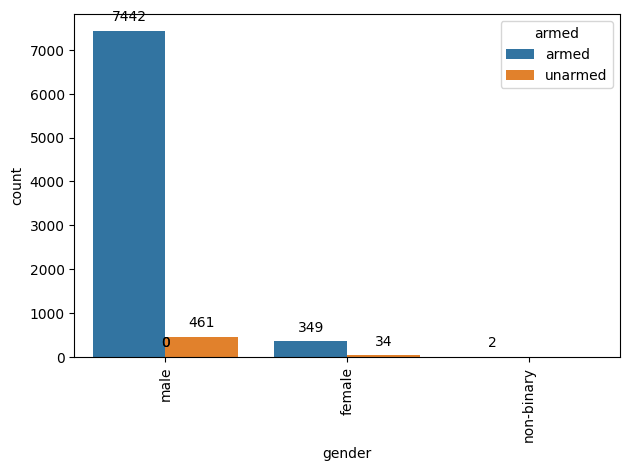

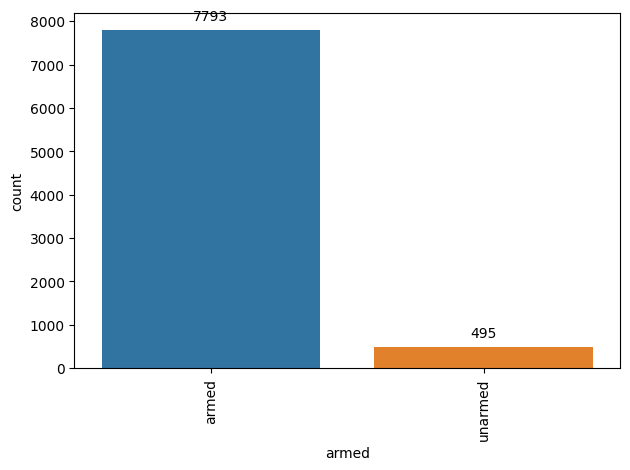

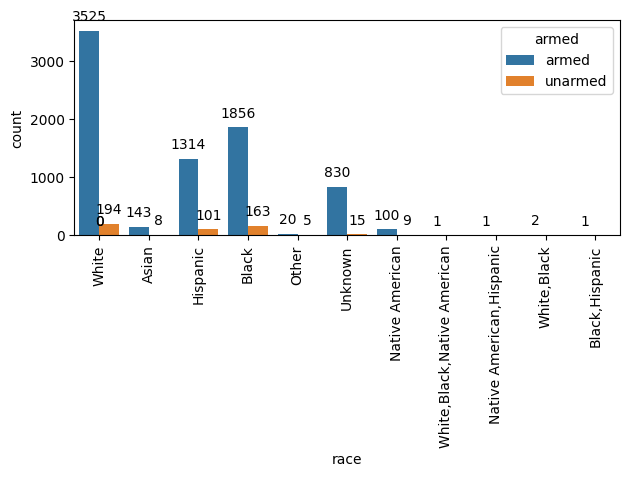

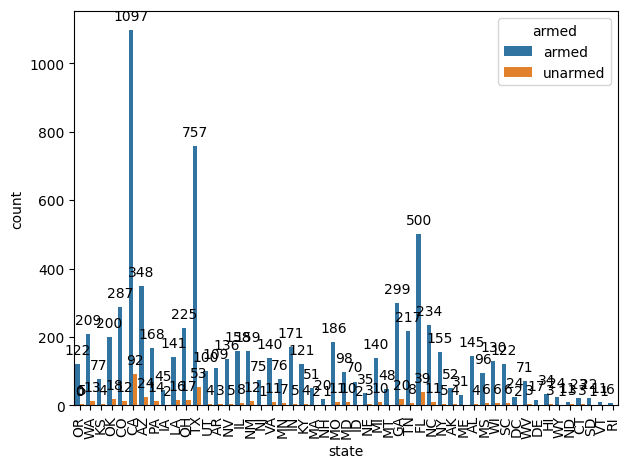

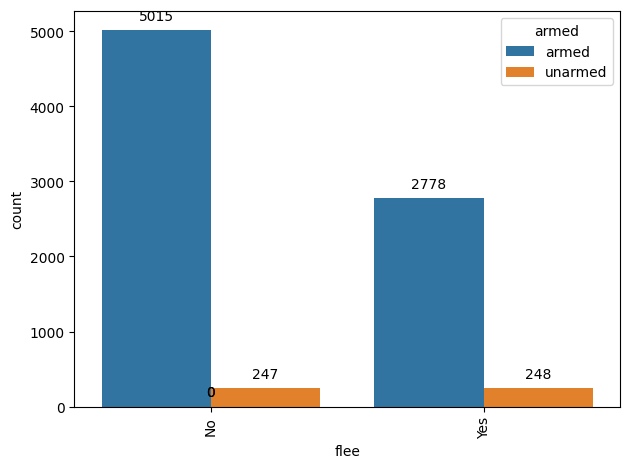

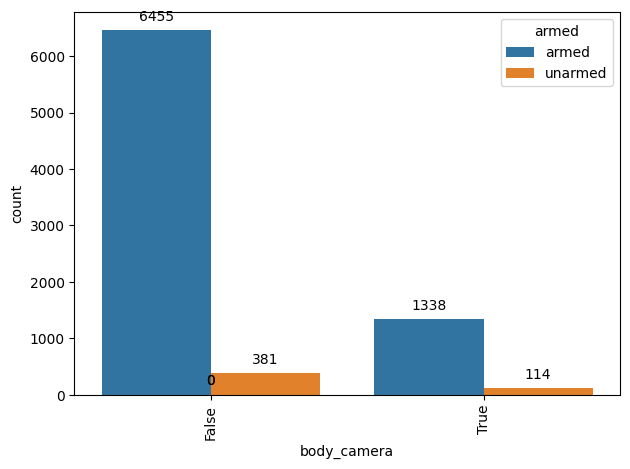

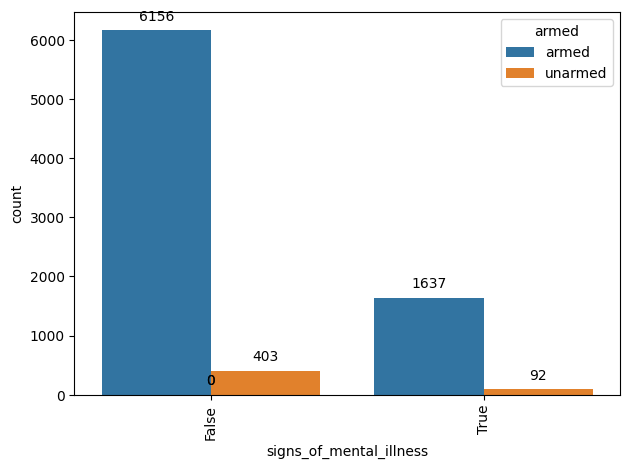

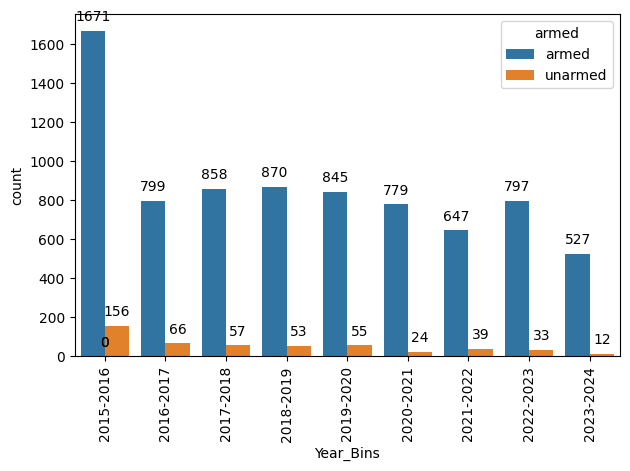

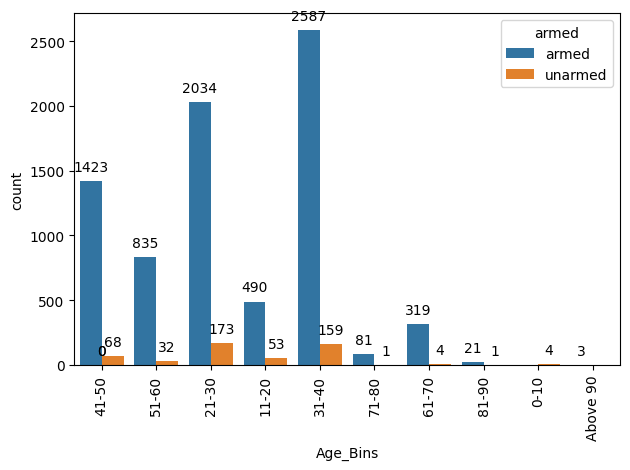

In [6]:
for i, predictor in enumerate(df.drop(columns=['police_departments_involved','city'])):
    plt.figure(i)
    ax = sns.countplot(data=df, x=predictor, hue='armed')
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    plt.xticks(rotation=90)
    plt.tight_layout()  
    plt.show()

# Insights 

1). The death by cop percentage of Male  is much higher then female ratio is 10:1

2) few females are unarmed and majorly feamle are armed

3) White,Hispanic,Black peoples are more major category of peoples who were died,
69.5 percentage of People are die re these race category peoples 

4) 24.3 percentage dead peoples are belongs to CA,FlL,TX states

5) The highest murder peoples number are record in the year 2015-2016 

6) Age lies between 21-45 of peoples who were died

7) The ratio of ramed and unarmed peoples are 16:1

8) The numbers of unarmed dead peoples are decline year by year like in 2015 the number of unarmed pwoples are 156 but in 2023 only 12 peoples 
who were died in us by cops wre unarmed

9) 25-40 age group peoples are most like to armed


In [12]:
temp = pd.DataFrame(df.drop(columns=['police_departments_involved','city','state']))
temp

,gender,armed,race,flee,body_camera,signs_of_mental_illness,Year_Bins,Age_Bins
0,male,armed,White,No,False,False,2015-2016,41-50
1,male,armed,Asian,No,False,True,2015-2016,51-60
2,male,unarmed,Hispanic,No,False,False,2015-2016,21-30
3,male,armed,White,No,False,False,2015-2016,11-20
4,male,armed,Hispanic,No,False,False,2015-2016,31-40
...,...,...,...,...,...,...,...,...
8283,male,armed,Unknown,No,False,False,2023-2024,31-40
8284,male,armed,Unknown,No,False,False,2023-2024,31-40
8285,male,armed,Unknown,Yes,False,False,2023-2024,31-40
8286,male,armed,White,Yes,False,False,2023-2024,31-40


In [13]:
new_df_dummies = pd.get_dummies(temp)
new_df_dummies = new_df_dummies.astype(int)
new_df_dummies

,body_camera,signs_of_mental_illness,gender_female,gender_male,gender_non-binary,armed_armed,armed_unarmed,race_Asian,race_Black,"race_Black,Hispanic",...,Age_Bins_0-10,Age_Bins_11-20,Age_Bins_21-30,Age_Bins_31-40,Age_Bins_41-50,Age_Bins_51-60,Age_Bins_61-70,Age_Bins_71-80,Age_Bins_81-90,Age_Bins_Above 90
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8283,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8284,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8285,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8286,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<Axes: >

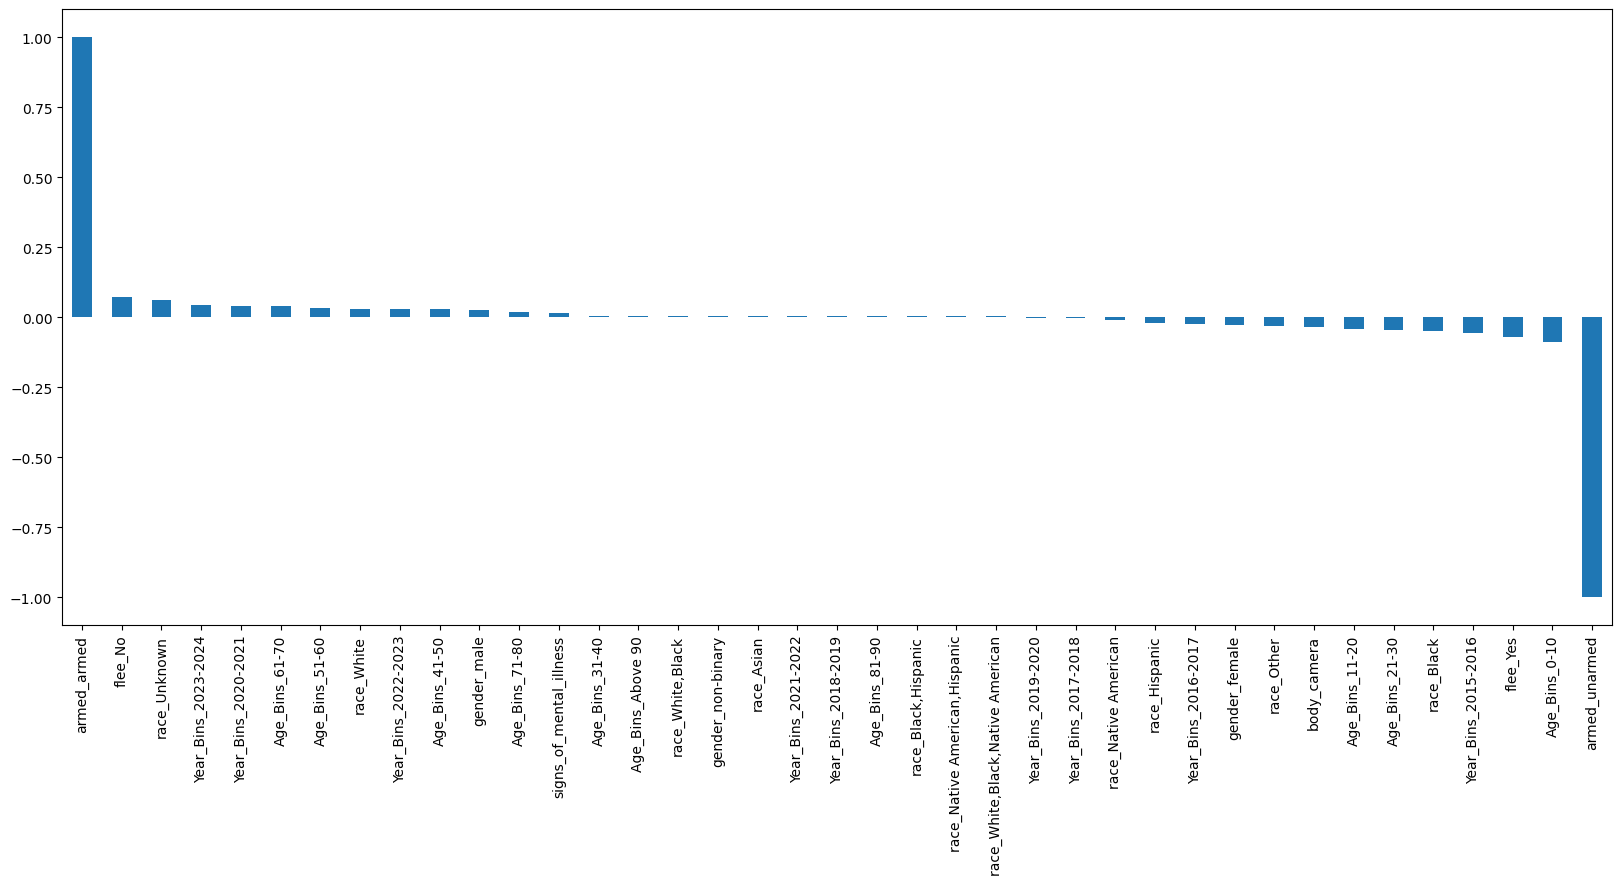

In [16]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['armed_armed'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

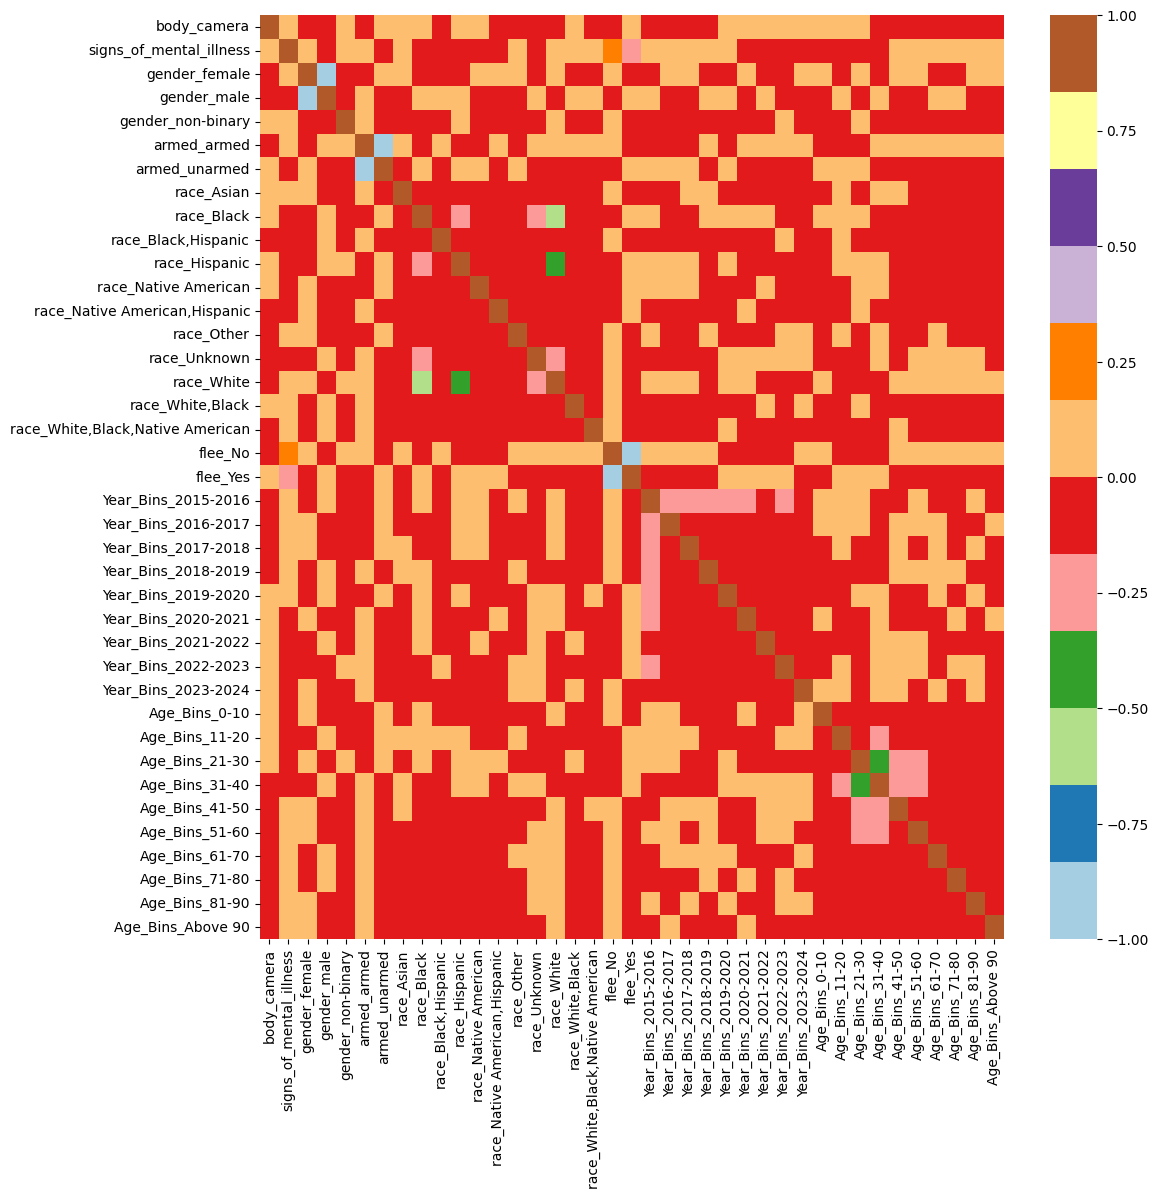

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(),cmap=("Paired"))

# Insights 
#### Low or No Correlation:
The lighter colors, like yellow and pink, indicate lower or no correlation between features. For example, body_camera and signs_of_mental_illness have weaker correlations with other features.
##### Strong Positive Correlations:
Diagonal elements (brown color) indicate features that are perfectly correlated with themselves (autocorrelation). There might be a slight positive correlation between some features, as shown by some patches of green and blue.

In [18]:
import plotly.express as px

In [20]:
df_groupby_race=df.groupby("race")["race"].count().to_frame()

In [21]:
fig = px.pie(df_groupby_race, values='race',names=df_groupby_race.index,title='Number of cases by race')
fig.show()


In [ ]:
# White , Black , Hispanic have major peoples

In [22]:
armed_peoples = df.loc[df['armed']=='armed']
unarmed_peoples = df.loc[df['armed']=='unarmed']

In [23]:
len(armed_peoples)

7793

In [24]:
len(unarmed_peoples)

495

In [26]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

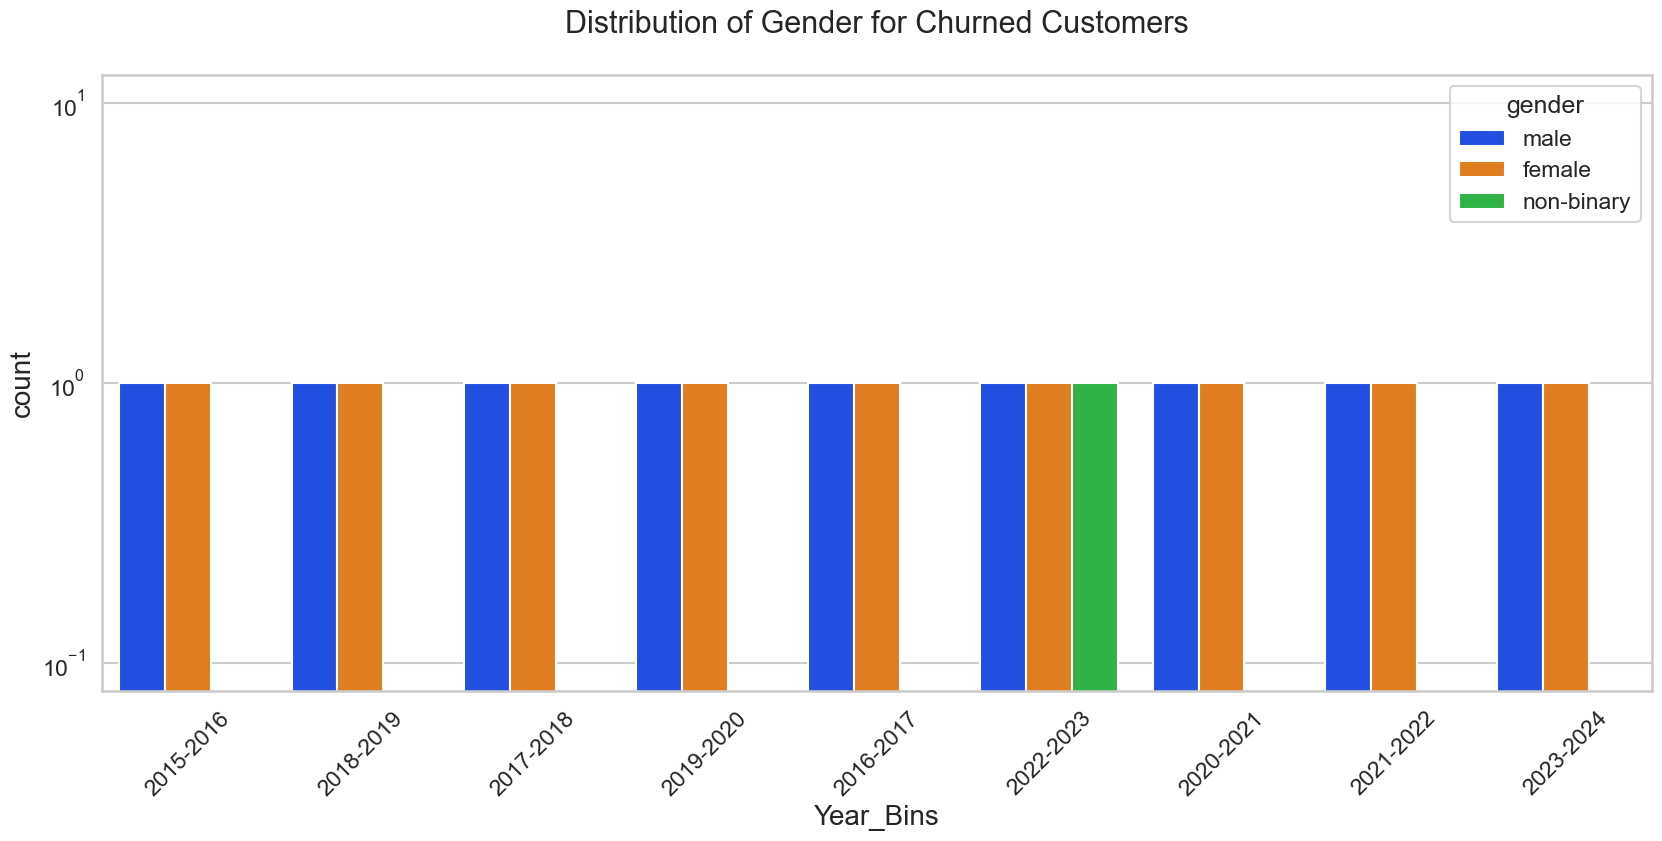

In [34]:
uniplot(armed_peoples,col='Year_Bins',title='Distribution of Gender for Churned Customers',hue='gender')